In [551]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [552]:
rain_df = pd.read_csv('../historical-data/rain-data.csv')

In [553]:
# Overall Information
print(rain_df.head(8))

      location      Jardim de Belém
0          lat             38.75000
1          lon             -9.00000
2          asl               70.106
3     variable  Precipitation Total
4         unit                   mm
5        level                  sfc
6   resolution               hourly
7  aggregation                  NaN


In [554]:
rain_df = pd.read_csv('../historical-data/rain-data.csv', header=9)

In [555]:
# Rename Columns
rain_df = rain_df.rename(columns={'timestamp': 'Date/Hour', 'Jardim de Belém Precipitation Total': 'Precipitation (mm)'})

In [556]:
#Convert to datetime
rain_df['Date/Hour'] = pd.to_datetime(rain_df['Date/Hour'])
rain_df['Date'] = rain_df['Date/Hour'].dt.date
rain_df['Hour'] = rain_df['Date/Hour'].dt.hour

In [557]:
#Rearrange columns
rain_df = rain_df.drop(columns=['Date/Hour'])
rain_df = rain_df[['Date','Hour', 'Precipitation (mm)']]

In [558]:
rain_df.reset_index(drop=True, inplace=True)

In [559]:
#Only show data from 7am to 10pm
rain_df = rain_df[(rain_df['Hour'] >= 7) & (rain_df['Hour'] <= 22)]

In [560]:
# Group days by date
rain_df = rain_df.groupby('Date').agg({'Precipitation (mm)': 'sum'}).reset_index()

In [561]:
rain_df

,Date,Precipitation (mm)
0,2023-01-01,11.5
1,2023-01-02,0.0
2,2023-01-03,0.0
3,2023-01-04,0.0
4,2023-01-05,0.0
...,...,...
849,2025-04-29,0.0
850,2025-04-30,0.0
851,2025-05-01,0.0
852,2025-05-02,0.0


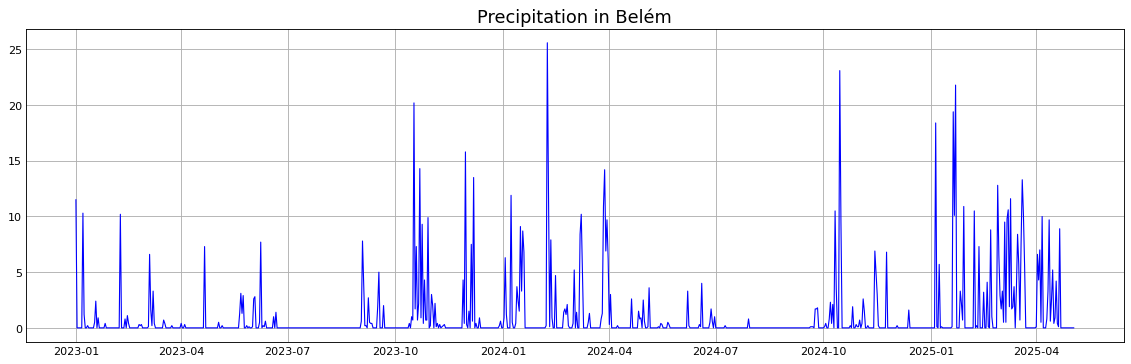

In [562]:
# Data
x = rain_df['Date'].values
y = rain_df['Precipitation (mm)'].values

# Plot
fig, ax = plt.subplots(figsize=(14, 4), dpi=80)

ax.plot(x, y, color='blue', linewidth=1)
ax.set_title('Precipitation in Belém', fontsize=16)

plt.show()

In [563]:
# Save to CSV
rain_df.to_csv('./clean-data/rain-data-processed.csv', index=False)